In [1]:
"""
File presents operations performed in order to preprocess data to use in machine learning algorithms. 
Dataset downloaded from: https://www.kaggle.com/jsrojas/ip-network-traffic-flows-labeled-with-87-apps
"""

'\nFile presents operations performed in order to preprocess data to use in machine learning algorithms. \nDataset downloaded from: https://www.kaggle.com/jsrojas/ip-network-traffic-flows-labeled-with-87-apps\n'

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import socket, struct

import imblearn
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import NearMiss

In [2]:
filepath = "Dataset-Unicauca-Version2-87Atts.csv"
df = pd.read_csv(filepath)
df

,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,...,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Label,L7Protocol,ProtocolName
0,172.19.1.46-10.200.7.7-52422-3128-6,172.19.1.46,52422,10.200.7.7,3128,6,26/04/201711:11:17,45523,22,55,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
1,172.19.1.46-10.200.7.7-52422-3128-6,10.200.7.7,3128,172.19.1.46,52422,6,26/04/201711:11:17,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
2,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,1,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
3,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,217,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
4,192.168.72.43-10.200.7.7-55961-3128-6,192.168.72.43,55961,10.200.7.7,3128,6,26/04/201711:11:17,78068,5,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3577291,10.200.7.199-98.138.79.73-42135-443-6,98.138.79.73,443,10.200.7.199,42135,6,15/05/201705:43:40,2290821,5,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,91,SSL
3577292,10.200.7.217-98.138.79.73-51546-443-6,98.138.79.73,443,10.200.7.217,51546,6,15/05/201705:46:10,24,5,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,91,SSL
3577293,10.200.7.218-98.138.79.73-44366-443-6,98.138.79.73,443,10.200.7.218,44366,6,15/05/201705:45:39,2591653,6,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,91,SSL
3577294,10.200.7.195-98.138.79.73-52341-443-6,98.138.79.73,443,10.200.7.195,52341,6,15/05/201705:45:59,2622421,4,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,91,SSL


In [3]:
# Function that changes IP addresses into numbers

def ip2int(ip):
    packedIP = socket.inet_aton(ip)
    return struct.unpack("!L", packedIP)[0]

In [4]:
# Converting IP addresses into numbers
df['Source.IP'] = df['Source.IP'].apply(ip2int)
df['Destination.IP'] = df['Destination.IP'].apply(ip2int)

In [5]:
# Checking if any value in the dataframe is null
df.isnull().values.any()

False

In [6]:
# Checking types of values
print(df.dtypes)

Flow.ID              object
Source.IP             int64
Source.Port           int64
Destination.IP        int64
Destination.Port      int64
                     ...   
Idle.Max            float64
Idle.Min            float64
Label                object
L7Protocol            int64
ProtocolName         object
Length: 87, dtype: object


In [7]:
# Checking columns that have only one unique value
df.columns[df.nunique() <= 1].value_counts()

KeyboardInterrupt: 

In [15]:
# Checking occurance of each application
print(df['ProtocolName'].value_counts().iloc[6:20])

AMAZON            86875
MICROSOFT         54710
GMAIL             40260
WINDOWS_UPDATE    34471
SKYPE             30657
FACEBOOK          29033
DROPBOX           25102
YAHOO             21268
TWITTER           18259
CLOUDFLARE        14737
MSN               14478
CONTENT_FLASH      8589
APPLE              7615
OFFICE_365         5941
Name: ProtocolName, dtype: int64


In [12]:
# Features that will be removed from dataset because they have low occurances of records in dataset
feats_toDelete = df['ProtocolName'].value_counts()[-25:].index
feats_toDelete

Index(['MSSQL', 'CNN', 'LASTFM', 'CITRIX', 'ORACLE', 'TEAMSPEAK', 'BGP',
       'WHOIS_DAS', 'BITTORRENT', 'RTMP', 'MAIL_IMAPS', 'SKINNY', 'OPENSIGNAL',
       'OSCAR', 'LOTUS_NOTES', 'SIMET', 'RADIUS', 'IP_OSPF', 'SNMP', 'OPENVPN',
       'STARCRAFT', 'QQ', 'SOCKS', 'NFS', '99TAXI'],
      dtype='object')

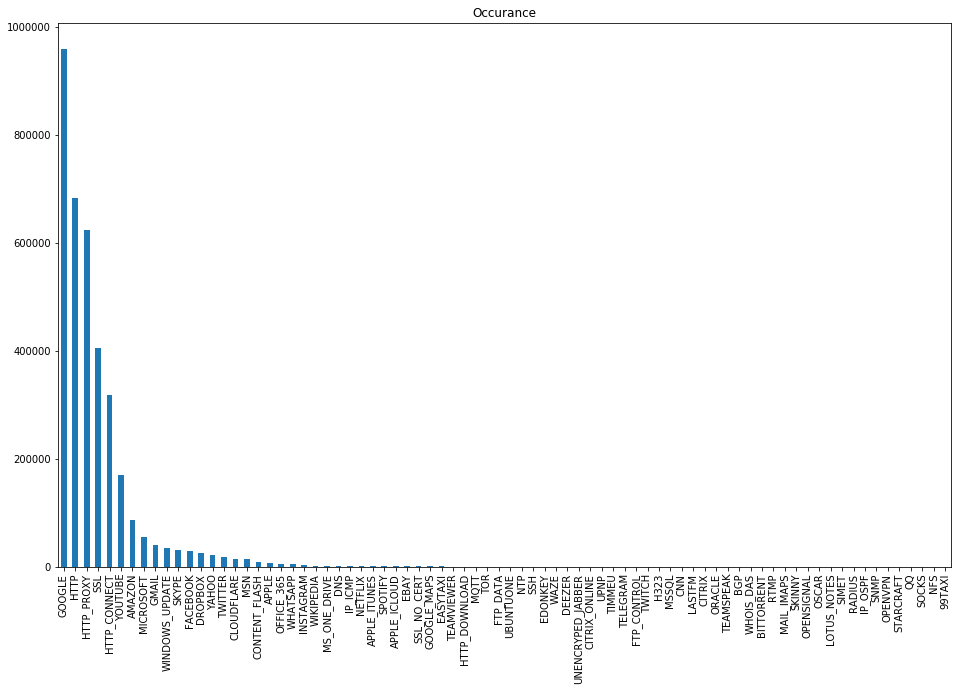

In [13]:
# Plot the number of records for individual applications
target_count = df['ProtocolName'].value_counts()
plt.figure(figsize=(16,10))
target_count.plot(kind='bar', title='Occurance');

In [14]:
# Removal of the applications saved in feats_toDelete var because they occur in a small amount of records and do not have a major impact on the model
df = df[~df.ProtocolName.isin(feats_toDelete)]

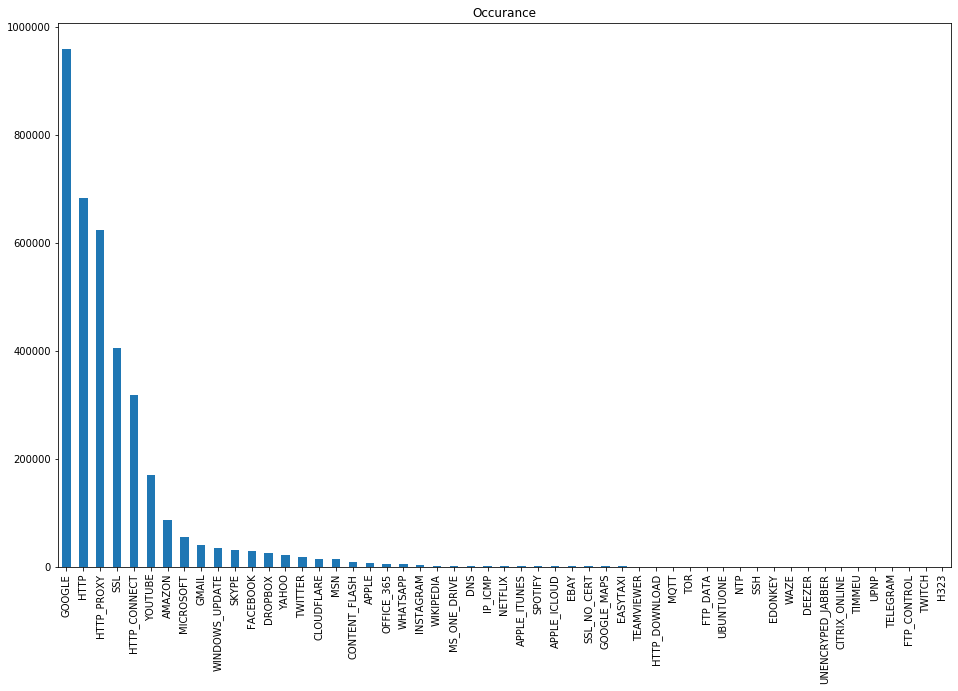

In [15]:
# Plot the number of records for individual applications one more time after some application removal
target_count2 = df['ProtocolName'].value_counts()
plt.figure(figsize=(16,10))
target_count2.plot(kind='bar', title='Occurance');

In [23]:
feats = [x for x in df.columns if x != 'ProtocolName']
len(feats)

86

In [20]:
df[feats].head()

,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,...,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Label,L7Protocol
0,172.19.1.46-10.200.7.7-52422-3128-6,2886926638,52422,180881159,3128,6,26/04/201711:11:17,45523,22,55,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131
1,172.19.1.46-10.200.7.7-52422-3128-6,180881159,3128,2886926638,52422,6,26/04/201711:11:17,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131
2,10.200.7.217-50.31.185.39-38848-80-6,840939815,80,180881369,38848,6,26/04/201711:11:17,1,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,7
3,10.200.7.217-50.31.185.39-38848-80-6,840939815,80,180881369,38848,6,26/04/201711:11:17,217,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,7
4,192.168.72.43-10.200.7.7-55961-3128-6,3232253995,55961,180881159,3128,6,26/04/201711:11:17,78068,5,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131


In [21]:
feats_importance = ['Destination.IP', 'Destination.Port', 'Source.IP', 'Init_Win_bytes_forward',
 'min_seg_size_forward', 'Fwd.Packet.Length.Max', 'Init_Win_bytes_backward', 'Flow.IAT.Max',
 'Source.Port', 'Flow.Duration', 'Fwd.Packet.Length.Std', 'Bwd.IAT.Total',
 'Avg.Fwd.Segment.Size', 'Fwd.Packets.s', 'Fwd.IAT.Total', 'Fwd.IAT.Max',
 'Fwd.Packet.Length.Mean', 'Subflow.Fwd.Bytes', 'Flow.Bytes.s', 'Min.Packet.Length',
 'Total.Length.of.Fwd.Packets', 'Bwd.IAT.Max', 'Packet.Length.Variance', 'Bwd.Packets.s',
 'Flow.IAT.Mean', 'Fwd.Header.Length', 'act_data_pkt_fwd', 'Max.Packet.Length',
 'Flow.Packets.s', 'Flow.IAT.Std', 'Packet.Length.Std', 'Idle.Max',
 'Fwd.Header.Length.1', 'Bwd.Packet.Length.Mean', 'Bwd.IAT.Std', 'Fwd.Packet.Length.Min',
 'Bwd.Packet.Length.Std', 'Avg.Bwd.Segment.Size', 'Average.Packet.Size', 'Total.Length.of.Bwd.Packets',
 'Packet.Length.Mean', 'Fwd.IAT.Mean', 'Fwd.IAT.Std', 'Flow.IAT.Min',
 'Bwd.IAT.Mean', 'Bwd.Packet.Length.Max', 'Subflow.Fwd.Packets', 'Total.Fwd.Packets',
 'Total.Backward.Packets', 'Bwd.Header.Length', 'Subflow.Bwd.Bytes', 'Subflow.Bwd.Packets', 
 'Idle.Mean', 'Fwd.IAT.Min', 'Down.Up.Ratio', 'Idle.Min']

In [22]:
len(feats_importance)

56

In [40]:
# len(df.columns)
feats2 = df.columns[7:]
feats2 = [x for x in feats2 if x != 'ProtocolName' and x != 'Label']
len(feats2)

78

In [41]:
# X = df[[df.columns[ 7 ],df.columns[ 8 ],df.columns[ 9 ],df.columns[ 10 ],df.columns[ 11 ],df.columns[ 12 ],df.columns[ 13 ],df.columns[ 14 ],df.columns[ 15 ],df.columns[ 16 ],df.columns[ 17 ],df.columns[ 18 ],df.columns[ 19 ],df.columns[ 20 ],df.columns[ 21 ],df.columns[ 22 ],df.columns[ 23 ],df.columns[ 24 ],df.columns[ 25 ],df.columns[ 26 ],df.columns[ 27 ],df.columns[ 28 ],df.columns[ 29 ],df.columns[ 30 ],df.columns[ 31 ],df.columns[ 32 ],df.columns[ 33 ],df.columns[ 34 ],df.columns[ 35 ],df.columns[ 36 ],df.columns[ 37 ],df.columns[ 38 ],df.columns[ 39 ],df.columns[ 40 ],df.columns[ 41 ],df.columns[ 42 ],df.columns[ 43 ],df.columns[ 44 ],df.columns[ 45 ],df.columns[ 46 ],df.columns[ 47 ],df.columns[ 48 ],df.columns[ 49 ],df.columns[ 50 ],df.columns[ 51 ],df.columns[ 52 ],df.columns[ 53 ],df.columns[ 54 ],df.columns[ 55 ],df.columns[ 56 ],df.columns[ 57 ],df.columns[ 58 ],df.columns[ 59 ],df.columns[ 60 ],df.columns[ 61 ],df.columns[ 62 ],df.columns[ 63 ],df.columns[ 64 ],df.columns[ 65 ],df.columns[ 66 ],df.columns[ 67 ],df.columns[ 68 ],df.columns[ 69 ],df.columns[ 70 ],df.columns[ 71 ],df.columns[ 72 ],df.columns[ 73 ],df.columns[ 74 ],df.columns[ 75 ],df.columns[ 76 ],df.columns[ 77 ],df.columns[ 78 ],df.columns[ 79 ],df.columns[ 80 ],df.columns[ 81 ],df.columns[ 82 ],df.columns[ 83 ]]].values 

In [42]:
df[feats2[-2]].unique()

array([       0.,  5673580.,  5592156., ..., 26603719., 10409637.,
       11324238.])

In [43]:
X = df[feats2].astype(float)
Y = df['ProtocolName']

In [44]:
# Convert application names to numbers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

In [45]:
print(sorted(Counter(Y).items()))

print(sorted(Counter(encoded_Y).items()))

[('AMAZON', 86875), ('APPLE', 7615), ('APPLE_ICLOUD', 1200), ('APPLE_ITUNES', 1287), ('CITRIX_ONLINE', 38), ('CLOUDFLARE', 14737), ('CONTENT_FLASH', 8589), ('DEEZER', 74), ('DNS', 1695), ('DROPBOX', 25102), ('EASYTAXI', 705), ('EBAY', 1192), ('EDONKEY', 95), ('FACEBOOK', 29033), ('FTP_CONTROL', 25), ('FTP_DATA', 251), ('GMAIL', 40260), ('GOOGLE', 959110), ('GOOGLE_MAPS', 807), ('H323', 21), ('HTTP', 683734), ('HTTP_CONNECT', 317526), ('HTTP_DOWNLOAD', 516), ('HTTP_PROXY', 623210), ('INSTAGRAM', 2415), ('IP_ICMP', 1631), ('MICROSOFT', 54710), ('MQTT', 302), ('MSN', 14478), ('MS_ONE_DRIVE', 1748), ('NETFLIX', 1560), ('NTP', 135), ('OFFICE_365', 5941), ('SKYPE', 30657), ('SPOTIFY', 1269), ('SSH', 102), ('SSL', 404883), ('SSL_NO_CERT', 856), ('TEAMVIEWER', 527), ('TELEGRAM', 33), ('TIMMEU', 34), ('TOR', 276), ('TWITCH', 24), ('TWITTER', 18259), ('UBUNTUONE', 249), ('UNENCRYPED_JABBER', 45), ('UPNP', 34), ('WAZE', 79), ('WHATSAPP', 4593), ('WIKIPEDIA', 2025), ('WINDOWS_UPDATE', 34471), ('YA

In [46]:
dict_nearMiss = {
"GOOGLE":            10000,
"HTTP":              10000,
"HTTP_PROXY":        10000,
"SSL":               10000,
"HTTP_CONNECT":      10000,
"YOUTUBE":           10000,
"AMAZON":             10000,
"MICROSOFT":          10000,
"GMAIL":              10000,
"WINDOWS_UPDATE":     10000,
"SKYPE":              10000,
"FACEBOOK":           10000,
"DROPBOX":            10000,
"YAHOO":              10000,
"TWITTER":            10000,
"CLOUDFLARE":         10000,
"MSN":                10000,
}

In [48]:
dict_smote = { "CONTENT_FLASH":       10000,
"APPLE":               10000,
"OFFICE_365":        10000,
"WHATSAPP":            10000,
"INSTAGRAM":          10000,
"WIKIPEDIA":           10000,
"MS_ONE_DRIVE":        10000,
"DNS":                 10000,
"IP_ICMP":             10000,
"NETFLIX":             10000,
"APPLE_ITUNES":        10000,
"SPOTIFY":             10000,
"APPLE_ICLOUD":        10000,
"EBAY":               10000,
"SSL_NO_CERT":          10000,
"GOOGLE_MAPS":          10000,
"EASYTAXI":             10000,
"TEAMVIEWER":           10000,
"HTTP_DOWNLOAD":        10000,
"MQTT":                 10000,
"TOR":                  10000,
"FTP_DATA":             10000,
"UBUNTUONE":            10000,
"NTP":                  10000,
"SSH": 10000}
print(dict_smote)

{'CONTENT_FLASH': 10000, 'APPLE': 10000, 'OFFICE_365': 10000, 'WHATSAPP': 10000, 'INSTAGRAM': 10000, 'WIKIPEDIA': 10000, 'MS_ONE_DRIVE': 10000, 'DNS': 10000, 'IP_ICMP': 10000, 'NETFLIX': 10000, 'APPLE_ITUNES': 10000, 'SPOTIFY': 10000, 'APPLE_ICLOUD': 10000, 'EBAY': 10000, 'SSL_NO_CERT': 10000, 'GOOGLE_MAPS': 10000, 'EASYTAXI': 10000, 'TEAMVIEWER': 10000, 'HTTP_DOWNLOAD': 10000, 'MQTT': 10000, 'TOR': 10000, 'FTP_DATA': 10000, 'UBUNTUONE': 10000, 'NTP': 10000, 'SSH': 10000}


In [49]:
# getting rid of the problem of unbalanced data set
pipe = make_pipeline(
    SMOTE(sampling_strategy=dict_smote),
    NearMiss(sampling_strategy=dict_nearMiss)
)

In [50]:
X_resampled, y_resampled = pipe.fit_resample(X, Y)

In [51]:
print("Shape pierwotnego pliku " + str(df.shape))
print("Shape X " + str(X.shape))
print("Shape X_resampled" + str(X_resampled.shape))
print("Shape Y " + str(Y.shape))
print("Shape y_resampled" + str(y_resampled.shape))

Shape pierwotnego pliku (3577082, 87)
Shape X (3577082, 78)
Shape X_resampled(420502, 78)
Shape Y (3577082,)
Shape y_resampled(420502,)


In [52]:
# creating new dataset
new_dataframe = pd.DataFrame(data = X_resampled, columns = feats2) 

In [53]:
new_dataframe['ProtocolName'] = y_resampled

In [55]:
new_dataframe.describe()

,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,Fwd.Packet.Length.Max,Fwd.Packet.Length.Min,Fwd.Packet.Length.Mean,Fwd.Packet.Length.Std,Bwd.Packet.Length.Max,...,min_seg_size_forward,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,L7Protocol
count,4.205020e+05,420502.000000,420502.000000,4.205020e+05,4.205020e+05,420502.000000,420502.000000,420502.000000,420502.000000,420502.000000,...,420502.000000,4.205020e+05,4.205020e+05,4.205020e+05,4.205020e+05,4.205020e+05,4.205020e+05,4.205020e+05,4.205020e+05,420502.000000
mean,1.435993e+07,101.141841,83.308704,5.686346e+04,4.327358e+04,389.067234,9.084881,84.135451,109.988724,782.568119,...,26.356477,4.032513e+05,1.159363e+05,5.435690e+05,3.156953e+05,4.200123e+06,4.782599e+05,4.632358e+06,3.816447e+06,131.661077
std,3.176897e+07,1034.765288,761.345357,1.139522e+06,1.340379e+06,1356.849045,58.882081,220.244016,235.047433,1671.485999,...,7.038905,3.663432e+06,1.329355e+06,4.371958e+06,3.454509e+06,1.336753e+07,2.879225e+06,1.437505e+07,1.279630e+07,57.893487
min,1.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000
25%,3.337993e+02,1.000000,1.000000,6.000000e+00,0.000000e+00,6.000000,0.000000,3.121454,0.000000,0.000000,...,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,92.000000
50%,3.002450e+04,3.000000,3.000000,5.400000e+01,1.500000e+01,31.000000,0.000000,12.735690,0.000000,6.000000,...,32.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,133.000000
75%,3.795189e+06,9.283102,8.773746,9.337432e+02,2.386315e+03,396.633407,6.000000,88.285714,145.649628,923.000000,...,32.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,175.000000
max,1.200000e+08,233033.000000,134496.000000,1.607666e+08,3.259112e+08,24616.000000,3235.000000,5965.538462,6143.343715,26064.000000,...,48.000000,1.115558e+08,6.899167e+07,1.115558e+08,1.115558e+08,1.200000e+08,6.988814e+07,1.200000e+08,1.200000e+08,222.000000


In [56]:
new_dataframe['ProtocolName'].head()

0    AMAZON
1    AMAZON
2    AMAZON
3    AMAZON
4    AMAZON
Name: ProtocolName, dtype: object

In [57]:
new_dataframe.to_csv('KaggleImbalanced.csv', index=False)